# Testing reward function

In [16]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [4]:
x=np.linspace(0,5,6)
y=np.linspace(0,5,6)

In [11]:
X, Y = np.meshgrid(x,y)
X[0,:]
Y[0,:]

array([0., 0., 0., 0., 0., 0.])

In [20]:
for pair in zip(X,Y):
    print(pair)

(array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]), array([-5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5.]))
(array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]), array([-4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4.]))
(array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]), array([-3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.]))
(array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]), array([-2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.]))
(array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]), array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]))
(array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))
(array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))
(array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]), array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]))
(

AttributeError: 'list' object has no attribute 'reshape'

In [202]:
res = 50

x=np.linspace(-1,1,res)
y=np.linspace(-1,1,res)

X, Y = np.meshgrid(x,y)

target_position = np.array([0,0])

obstacle = np.array([0.5,0.5])

distance = np.ndarray((res,res))
R_ET = np.ndarray((res,res))

R_0 = np.ndarray((res,res))

obs_distance = np.ndarray((res,res))
d_ref = 0.2
discount = 8

delta = .2

for i in range(len(X)):
    for j in range(len(Y)):
        #print([X[i, j], Y[i,j]])
        distance[i][j] = np.linalg.norm(np.array([X[i, j], Y[i,j]]) - target_position, ord=None)
        if abs(distance[i][j]) < delta:
            R_ET[i][j] = 0.5 * (distance[i][j] ** 2)
        else:
            R_ET[i][j] = delta * (distance[i][j] - 0.5 * delta)
        
        obs_distance[i][j] = np.sum(np.square(np.array([X[i, j], Y[i,j]]) - obstacle))
        R_0[i][j] = (d_ref / (obs_distance[i][j] + d_ref)) ** discount

Z = -(1000 * R_ET + 100 * R_0)

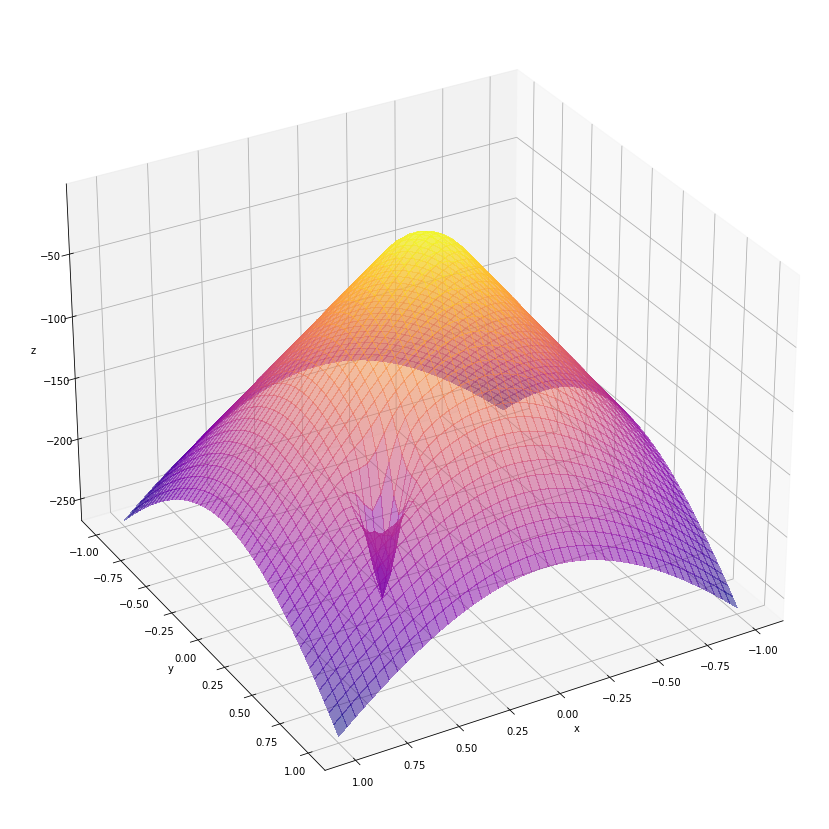

In [200]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
# rotation
ax.view_init(30, 60)
plt.show()

In [144]:
R_0.round(6).min()

0.0

In [142]:
obs_distance.min()

0.014430750636460012

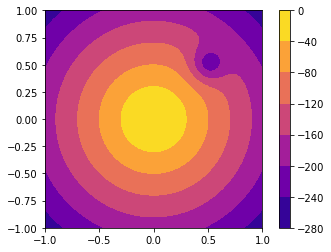

In [203]:
fig=plt.figure()
plt.contourf(X,Y,Z,cmap='plasma')
plt.axis('scaled')
plt.colorbar()
plt.show()